<a href="https://colab.research.google.com/github/dldisha/IntiLP/blob/main/Cancermine_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Name: IntiLP (Intelligent Language Processing)


## Group Members: 
* Disha Lamba
* Kiarash Rastegar
* Somasundaram Palaniappan
* Mercy

## Project's Objective:
#### We propose an approach to use a deep learning NLP model that will be able to extract important information from biomedical literature and return a list of biological markers related to that disease. 

#### Here we will focus on 3 major types of cancer: lung, pancreatic, and colon. 


## Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

## Reading the csv file


In [3]:
#converting .tsv to .csv file
tsv_file ='/content/drive/MyDrive/cancermine_unfiltered.tsv'
 
# reading given tsv file
csv_table = pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('cancermine_unfil.csv',index=False)

In [4]:
Master_dataset = pd.read_csv('cancermine_unfil.csv')

In [5]:
Master_dataset.head()

,pmid,title,journal,journal_short,year,month,day,section,subsection,role,...,cancer_start,cancer_end,gene_hugo_id,gene_entrez_id,gene_name,gene_normalized,gene_start,gene_end,sentence,formatted_sentence
0,33692570,COVID-19 and liver disease: mechanistic and cl...,Nature Reviews. Gastroenterology & Hepatology,Nature Reviews. Gastroenterology & Hepatology,2021,3,10,article,introduction,Tumor_Suppressor,...,108,116,HGNC:11998,7157,p53,TP53,159,162,This discrepancy between cellular models could...,This discrepancy between cellular models could...
1,33767402,Ruxolitinib before allogeneic hematopoietic tr...,Bone Marrow Transplantation,Bone Marrow Transplantation,2021,3,25,article,introduction,Oncogene,...,0,13,HGNC:1455,811,calreticulin (CALR),CALR,334,353,"Myelofibrosis (MF) is a chronic malignancy, ch...",<b>Myelofibrosis</b> (MF) is a chronic maligna...
2,33767402,Ruxolitinib before allogeneic hematopoietic tr...,Bone Marrow Transplantation,Bone Marrow Transplantation,2021,3,25,article,introduction,Oncogene,...,310,318,HGNC:1455,811,calreticulin (CALR),CALR,334,353,"Myelofibrosis (MF) is a chronic malignancy, ch...","Myelofibrosis (MF) is a chronic malignancy, ch..."
3,34002056,Kinase drug discovery 20 years after imatinib:...,Nature Reviews. Drug Discovery,Nature Reviews. Drug Discovery,2021,5,17,article,introduction,Oncogene,...,86,113,HGNC:9967,5979,RET,RET,0,3,RET is a proto-oncogenic RTK in which activati...,<b>RET</b> is a proto-oncogenic RTK in which a...
4,34002056,Kinase drug discovery 20 years after imatinib:...,Nature Reviews. Drug Discovery,Nature Reviews. Drug Discovery,2021,5,17,article,introduction,Driver,...,156,170,HGNC:9967,5979,RET,RET,145,148,"These compounds, which included cabozantinib, ...","These compounds, which included cabozantinib, ..."


## EDA Analysis

In [6]:
Master_dataset.describe()

,pmid,year,predictprob,cancer_start,cancer_end,gene_entrez_id,gene_start,gene_end
count,2.518290e+05,251829.000000,251829.000000,251829.000000,251829.000000,2.518290e+05,251829.000000,251829.000000
mean,2.767741e+07,2015.963650,0.734172,117.153739,130.932474,7.309011e+04,87.637977,94.368818
std,6.449950e+06,5.975818,0.154890,83.014176,83.410870,2.401621e+06,86.366236,87.306199
min,6.881900e+04,1977.000000,0.500001,0.000000,3.000000,1.000000e+00,0.000000,3.000000
25%,2.450812e+07,2014.000000,0.593044,60.000000,74.000000,2.245000e+03,24.000000,30.000000
50%,2.915673e+07,2018.000000,0.719130,101.000000,115.000000,4.893000e+03,63.000000,69.000000
75%,3.258271e+07,2020.000000,0.873615,158.000000,172.000000,7.538000e+03,131.000000,138.000000
max,3.578907e+07,2023.000000,0.999988,933.000000,951.000000,1.053710e+08,973.000000,976.000000


In [7]:
Master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251829 entries, 0 to 251828
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pmid                251829 non-null  int64  
 1   title               251829 non-null  object 
 2   journal             251829 non-null  object 
 3   journal_short       251829 non-null  object 
 4   year                251829 non-null  int64  
 5   month               251829 non-null  object 
 6   day                 251829 non-null  object 
 7   section             251829 non-null  object 
 8   subsection          251829 non-null  object 
 9   role                251829 non-null  object 
 10  predictprob         251829 non-null  float64
 11  cancer_id           251829 non-null  object 
 12  cancer_name         251829 non-null  object 
 13  cancer_normalized   251829 non-null  object 
 14  cancer_start        251829 non-null  int64  
 15  cancer_end          251829 non-nul

In [8]:
print('\nMaster data shape:')
print('Shape:', Master_dataset.shape)
#identifying duplicates
print('\nDuplicate Values:')
print(Master_dataset.duplicated().any())


Master data shape:
Shape: (251829, 24)

Duplicate Values:
True


In [17]:
#dropping duplicates
Master_dataset = Master_dataset.drop_duplicates()
print('Shape:', Master_dataset.shape)

Shape: (251823, 24)


6 duplicate rows have been now removed from the master dataset. 

In [18]:
Master_dataset.isnull().sum()

pmid                  0
title                 0
journal               0
journal_short         0
year                  0
month                 0
day                   0
section               0
subsection            0
role                  0
predictprob           0
cancer_id             0
cancer_name           0
cancer_normalized     0
cancer_start          0
cancer_end            0
gene_hugo_id          0
gene_entrez_id        0
gene_name             0
gene_normalized       0
gene_start            0
gene_end              0
sentence              0
formatted_sentence    0
dtype: int64

No null value in the master dataset

In [10]:
Master_dataset.columns

Index(['pmid', 'title', 'journal', 'journal_short', 'year', 'month', 'day',
       'section', 'subsection', 'role', 'predictprob', 'cancer_id',
       'cancer_name', 'cancer_normalized', 'cancer_start', 'cancer_end',
       'gene_hugo_id', 'gene_entrez_id', 'gene_name', 'gene_normalized',
       'gene_start', 'gene_end', 'sentence', 'formatted_sentence'],
      dtype='object')

## Top Journal

In [50]:
journal = Master_dataset['journal'].value_counts()
journal

Oncotarget                                                                                      12571
PLoS ONE                                                                                         9204
Cancers                                                                                          8549
International Journal of Molecular Sciences                                                      6344
Frontiers in Oncology                                                                            6186
                                                                                                ...  
Seminars in ophthalmology                                                                           1
Skin pharmacology and physiology                                                                    1
ACS synthetic biology                                                                               1
IEEE transactions on signal processing : a publication of the IEEE Signal Processi

In [52]:
#the top 10
journal2 = journal[:10].copy()

#others
new_row = pd.DataFrame(data = {
    'name' : ['others'],
    'value' : [journal.values[10:].sum()]
})

journal2

Oncotarget                                     12571
PLoS ONE                                        9204
Cancers                                         8549
International Journal of Molecular Sciences     6344
Frontiers in Oncology                           6186
Oncogene                                        6027
Cancer research                                 5954
Scientific Reports                              4962
Nature Communications                           3605
Oncology Letters                                3263
Name: journal, dtype: int64

Index(['Oncotarget', 'PLoS ONE', 'Cancers',
       'International Journal of Molecular Sciences', 'Frontiers in Oncology',
       'Oncogene', 'Cancer research', 'Scientific Reports',
       'Nature Communications', 'Oncology Letters'],
      dtype='object') [12571  9204  8549  6344  6186  6027  5954  4962  3605  3263]


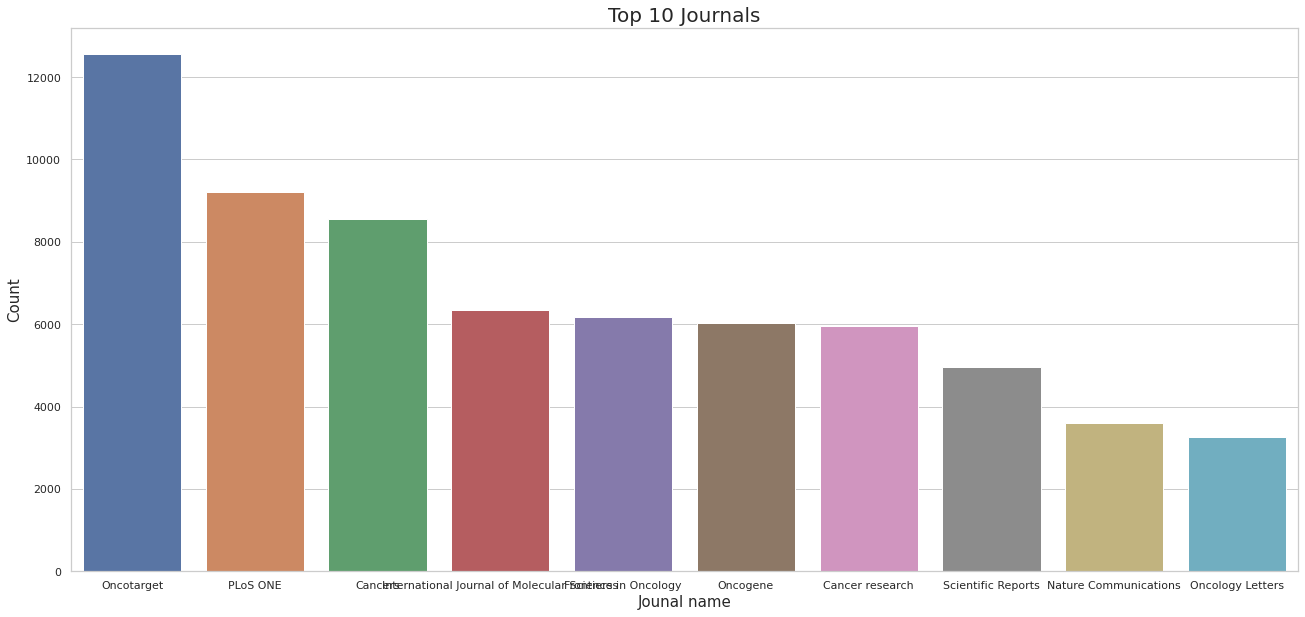

In [61]:
plt.figure(figsize=(22,10))

name = journal2.index
vals = journal2.values

print(name, vals)

sns.barplot(x = name, y = vals)
plt.title('Top 10 Journals',fontsize = 20)
plt.xlabel('Journal name', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

'Oncotarget', 'PLoS ONE', 'Cancers' are the top 3 journals that are referred for this dataset. 

## Types of Genes

In [42]:
gene = Master_dataset['gene_normalized'].value_counts()
gene

KRAS       11868
MYC        10585
TP53        9955
EGFR        6366
PTEN        4751
           ...  
CFAP251        1
ATP5F1A        1
HM13           1
STIP1          1
HSPA14         1
Name: gene_normalized, Length: 8415, dtype: int64

In [46]:
#the top 10
gene2 = gene[:10].copy()

#others
new_row = pd.DataFrame(data = {
    'name' : ['others'],
    'value' : [gene.values[10:].sum()]
})

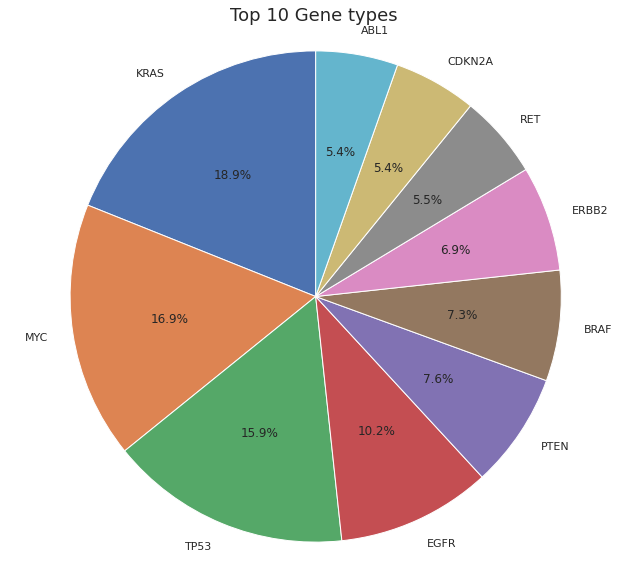

In [48]:
name = gene2.index
vals = gene2.values
figp, axp = plt.subplots(figsize=(11,10))

axp.pie(vals , labels=name, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')
plt.title('Top 10 Gene types', fontsize=18)
plt.show()

We can clearly see that KRAS, MYC, TP53 are the top 3 citied genes

## Types of Cancer

In [19]:
### Calculating Unique Types of  Cancers ######
cancer_types = np.unique(Master_dataset['cancer_normalized'])
print("Unique types of cancer: ",len(cancer_types)) # we have 621 cancer types (too much to visualize)

Unique types of cancer:  621


In [20]:
# making a list of the cancers that we care about for this specific project
cancers_of_interest = [] 
for cancer in cancer_types: 
  if re.search('lung', cancer): 
    cancers_of_interest.append(cancer)
  elif re.search('colon', cancer):
    cancers_of_interest.append(cancer)
  elif re.search('pancrea', cancer):
    cancers_of_interest.append(cancer)
  else: continue
print("Number of Cancer types: ",len(cancers_of_interest)) # only 31 types of cancers found
print("Cancer List:\n",cancers_of_interest)

Number of Cancer types:  31
Cancer List:
 ['asbestos-related lung carcinoma', 'colon adenocarcinoma', 'colon cancer', 'colon carcinoma', 'colon mucinous adenocarcinoma', 'colon sarcoma', 'lung adenocarcinoma', 'lung adenoid cystic carcinoma', 'lung cancer', 'lung carcinoma', 'lung combined type small cell carcinoma', 'lung giant cell carcinoma', 'lung large cell carcinoma', 'lung non-small cell carcinoma', 'lung oat cell carcinoma', 'lung papillary adenocarcinoma', 'lung sarcoma', 'lung sarcomatoid carcinoma', 'lung small cell carcinoma', 'lung squamous cell carcinoma', 'malignant exocrine pancreas neoplasm', 'mucinous lung adenocarcinoma', 'non-functioning pancreatic endocrine tumor', 'pancreatic acinar cell adenocarcinoma', 'pancreatic adenocarcinoma', 'pancreatic adenosquamous carcinoma', 'pancreatic cancer', 'pancreatic carcinoma', 'pancreatic ductal adenocarcinoma', 'pancreatic ductal carcinoma', 'pancreatic endocrine carcinoma']


In [21]:
filtered_dataset = Master_dataset[Master_dataset['cancer_normalized'].isin(cancers_of_interest)]
print("Shape of Filtered Data: ", filtered_dataset.shape)

Shape of Filtered Data:  (52473, 24)


Text(0, 0.5, 'Count')

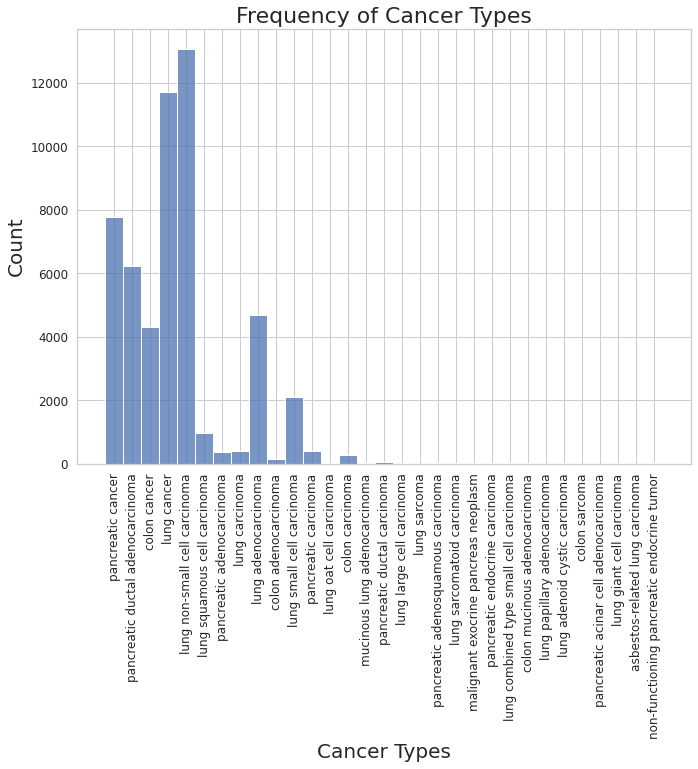

In [22]:
## Plotting Data Distribution of Cancer types ##
sns.set(rc = {'figure.figsize':(11,8)})
sns.set_style('whitegrid')
ax = sns.histplot(filtered_dataset, x='cancer_normalized')
ax.tick_params(axis='x', labelrotation = 90)
ax.tick_params(labelsize=12)
ax.axes.set_title("Frequency of Cancer Types",fontsize=22)
ax.set_xlabel("Cancer Types", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

Here we are looking at the frequency of the 31 different cancer types that matched my search query. Of the 31 cancer types we see that we have a larger proportion of cancers that are for the lungs. 

## Relationship between Gene, Cancer

In [74]:
rel = filtered_dataset.groupby(['gene_normalized', 'cancer_normalized'])['journal'].count().sort_values(ascending=False)
rel

gene_normalized  cancer_normalized               
KRAS             pancreatic ductal adenocarcinoma    2351
EGFR             lung non-small cell carcinoma       2044
KRAS             pancreatic cancer                   2017
                 lung cancer                         1613
                 lung non-small cell carcinoma       1547
                                                     ... 
KDM4A            lung carcinoma                         1
                 lung adenocarcinoma                    1
                 colon cancer                           1
KDM3A            pancreatic ductal adenocarcinoma       1
ZYX              pancreatic cancer                      1
Name: journal, Length: 9140, dtype: int64

In [76]:
#the top 10
rel2 = rel[:10].copy()
rel2

gene_normalized  cancer_normalized               
KRAS             pancreatic ductal adenocarcinoma    2351
EGFR             lung non-small cell carcinoma       2044
KRAS             pancreatic cancer                   2017
                 lung cancer                         1613
                 lung non-small cell carcinoma       1547
EGFR             lung cancer                          997
ALK              lung non-small cell carcinoma        914
KRAS             lung adenocarcinoma                  840
EGFR             lung adenocarcinoma                  611
CD274            lung non-small cell carcinoma        563
Name: journal, dtype: int64

KRAS, EGFR, ALK are the most common genes in the filtered cancer types. 